<a href="https://colab.research.google.com/github/JuniorHZ19/ArquitecturasCNN/blob/main/CNNSIMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#CNN SIMPLE:
import torch.nn as nn
import torch.optim as optim

# Definir un modelo simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Files already downloaded and verified
Files already downloaded and verified


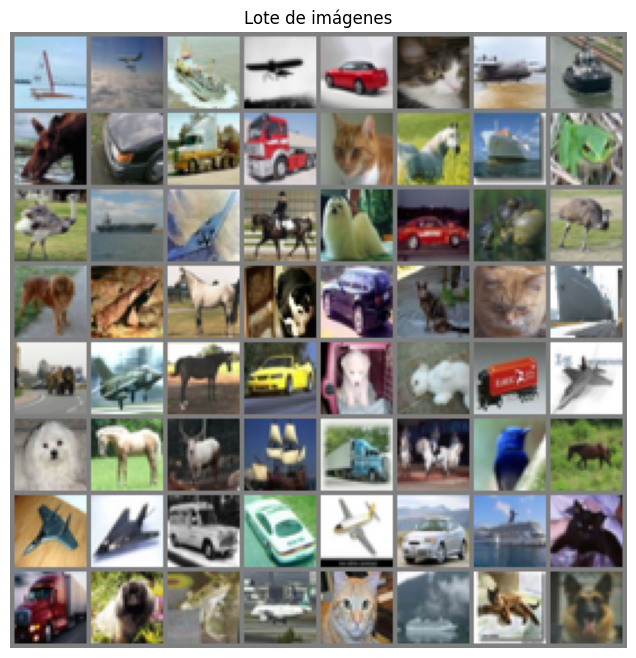

In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Transformaciones básicas para las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizar a [-1, 1]
])

# Cargar el dataset CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


data_lote,labels_lote=next(iter(train_loader))

grid = make_grid(data_lote, nrow=8, padding=2)

# Convertir la cuadrícula a formato visualizable
grid_np = grid.permute(1, 2, 0).numpy()
grid_np = (grid_np * 0.5) + 0.5  # Desnormalizar si las imágenes están normalizadas

# Mostrar la cuadrícula
plt.figure(figsize=(20, 8))
plt.imshow(grid_np)
plt.axis('off')
plt.title('Lote de imágenes')
plt.show()

In [25]:
# Inicializar modelo, pérdida y optimizador
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Entrenamiento simple
for epoch in range(10):  # Número de épocas
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Resetear gradientes
        outputs = model(inputs)  # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular pérdida
        loss.backward()  # Paso hacia atrás
        optimizer.step()  # Actualizar pesos
        running_loss += loss.item()

    print(f"Época {epoch+1}, Pérdida: {running_loss/len(train_loader)}")

correct = 0
total = 0
with torch.no_grad():  # Desactivar el cálculo de gradientes para la prueba
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Precisión: {100 * correct / total:.2f}%")

Época 1, Pérdida: 1.5838151098517201
Época 2, Pérdida: 1.1465615017334823
Época 3, Pérdida: 0.9561782851243568
Época 4, Pérdida: 0.8303213189248844
Época 5, Pérdida: 0.7335667528231126
Época 6, Pérdida: 0.6396609897275105
Época 7, Pérdida: 0.5542803212924077
Época 8, Pérdida: 0.47203525062412255
Época 9, Pérdida: 0.3947114598129869
Época 10, Pérdida: 0.33023764704689956


In [27]:
correct = 0
total = 0
with torch.no_grad():  # Desactivar el cálculo de gradientes para la prueba
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Precisión: {100 * correct / total:.2f}%")

Precisión: 69.63%
